<a href="https://colab.research.google.com/github/costagean/Redes_Neurais/blob/main/PROJETO_FINAL_REDES_NEURAIS_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importando as bibliotecas necessárias
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10


In [20]:
# Carregando e resumindo os datos anteriormente processados
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Img_Size = 32


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [21]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [22]:
Y_test = Y_test.ravel()
Y_train = Y_train.ravel()

In [23]:
# Definindo mecanismo de ajuda
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

# Definindo sequencia de camadas para o modelo em questão

model = Sequential()


# Rede neural do tipo CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

# As métricas, perdas e otimizadores todos foram importados da biblioiteca keras e definidos no sequenciamento a baixo:                                 
# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
print(Y_train.shape)
print(X_train.shape)


(50000, 10)
(50000, 32, 32, 3)


In [ ]:
# A execução das etapas de perdas e ganhos com o FeedBack do Keras
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, epochs=10, batch_size=32)
print("Returned:", r)

Epoch 1/10
 178/1563 [==>...........................] - ETA: 1:25 - loss: 0.3929 - accuracy: 0.8611

In [26]:
# visualização das variáveis-chaves acionadas acima
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy'])


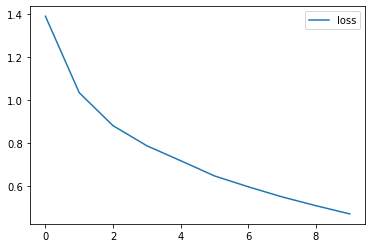

In [27]:
# plotagem dos gráficos de perda
plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

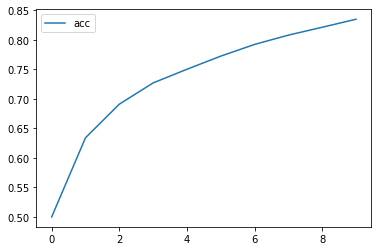

In [28]:
# plotagem da curva de precisão para tratamento dos dados escolhidos
plt.plot(r.history['accuracy'], label='acc')
#plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [29]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[5 8 8 ... 5 4 7]


In [30]:
N_test = len(ynew)

In [31]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [32]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [33]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[3 8 8 ... 5 1 7]


In [34]:
#Y_test[-2,:]

In [35]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [36]:
# variáveis alvo = ['group1.car', 'group2.car', 'group3.car', 'group4.car', 'group6.car', 'group7.car','group9.car']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.78      0.51      1000
           1       0.94      0.77      0.85      1000
           2       0.85      0.45      0.59      1000
           3       0.88      0.21      0.34      1000
           4       0.50      0.86      0.63      1000
           5       0.75      0.57      0.65      1000
           6       0.73      0.86      0.79      1000
           7       0.86      0.71      0.78      1000
           8       0.87      0.81      0.84      1000
           9       0.86      0.82      0.84      1000

    accuracy                           0.68     10000
   macro avg       0.76      0.68      0.68     10000
weighted avg       0.76      0.68      0.68     10000

